# EDA of Red-Wine Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [2]:
data = pd.read_csv("../Data/Cleaned Data/winequality-red.csv", sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Checking the Categories:

for col in data.columns:
    print("colun Name: ",col, "\n")
    print(pd.Categorical(data[col]),"\n\n")
    

colun Name:  fixed acidity 

[7.4, 7.8, 7.8, 11.2, 7.4, ..., 6.2, 5.9, 6.3, 5.9, 6.0]
Length: 1599
Categories (96, float64): [4.6, 4.7, 4.9, 5.0, ..., 15.0, 15.5, 15.6, 15.9] 


colun Name:  volatile acidity 

[0.70, 0.88, 0.76, 0.28, 0.70, ..., 0.600, 0.550, 0.510, 0.645, 0.310]
Length: 1599
Categories (143, float64): [0.12, 0.16, 0.18, 0.19, ..., 1.185, 1.240, 1.330, 1.580] 


colun Name:  citric acid 

[0.00, 0.00, 0.04, 0.56, 0.00, ..., 0.08, 0.10, 0.13, 0.12, 0.47]
Length: 1599
Categories (80, float64): [0.00, 0.01, 0.02, 0.03, ..., 0.76, 0.78, 0.79, 1.00] 


colun Name:  residual sugar 

[1.9, 2.6, 2.3, 1.9, 1.9, ..., 2.0, 2.2, 2.3, 2.0, 3.6]
Length: 1599
Categories (91, float64): [0.9, 1.2, 1.3, 1.4, ..., 13.8, 13.9, 15.4, 15.5] 


colun Name:  chlorides 

[0.076, 0.098, 0.092, 0.075, 0.076, ..., 0.090, 0.062, 0.076, 0.075, 0.067]
Length: 1599
Categories (153, float64): [0.012, 0.034, 0.038, 0.039, ..., 0.464, 0.467, 0.610, 0.611] 


colun Name:  free sulfur dioxide 

[11.0, 25.

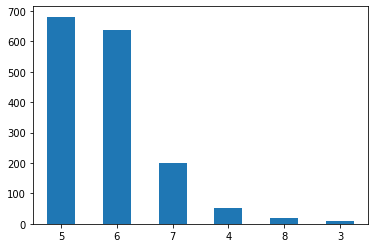

In [6]:
count_classes = pd.value_counts(data['quality'], sort=True)

count_classes.plot(kind='bar', rot=0)
plt.show()

In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
# 3, 4, 5: 0("low quality");
# 6, 7: 1("medium quality");
# 8, 9: 2("high quality");

data['quality'] = data['quality'].map({3:0, 4:0, 5:0, 6:0, 7:1, 8:1, 9:1})

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


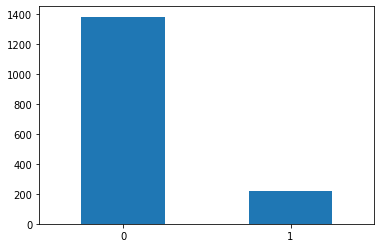

In [10]:
count_classes = pd.value_counts(data['quality'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.show()

In [11]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [12]:
Y = data['quality']
X = data.drop('quality', axis=1)

In [13]:
# Implementing Oversampling for Handling Imbalanced 

smk = SMOTE(random_state=42)
X_res, Y_res = SMOTE().fit_resample(X, Y)

In [14]:
data = X_res
data['quality'] = Y_res
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


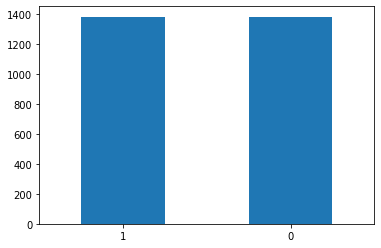

In [15]:
count_classes = pd.value_counts(data['quality'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.show()

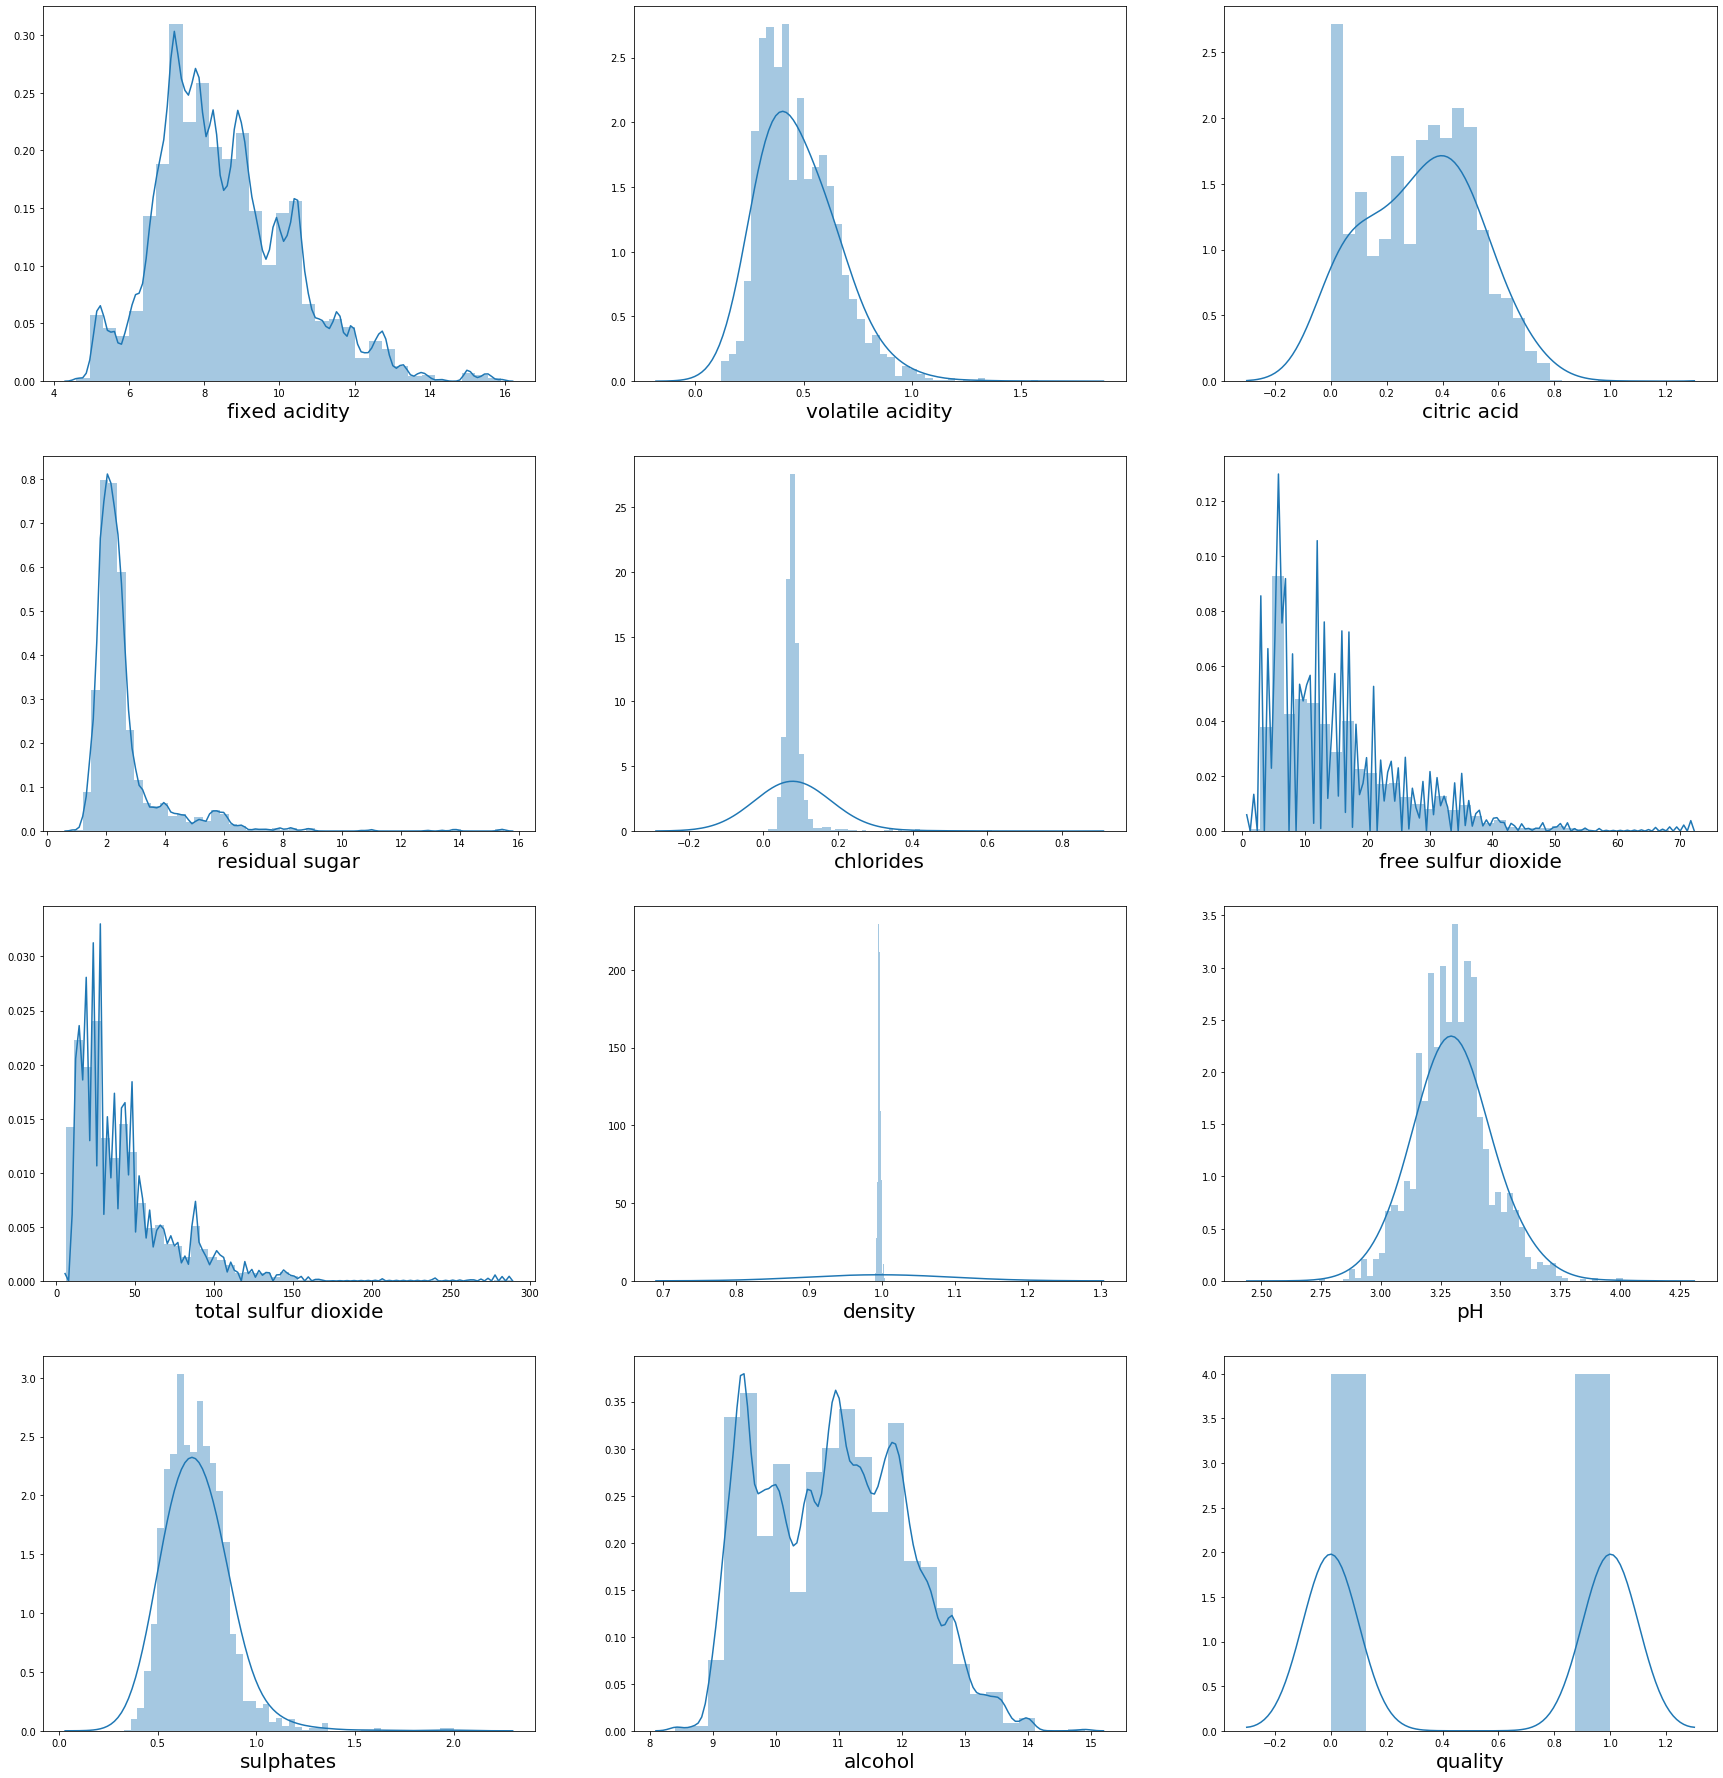

In [16]:
# std = data.hist(figsize = (30,30))

plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

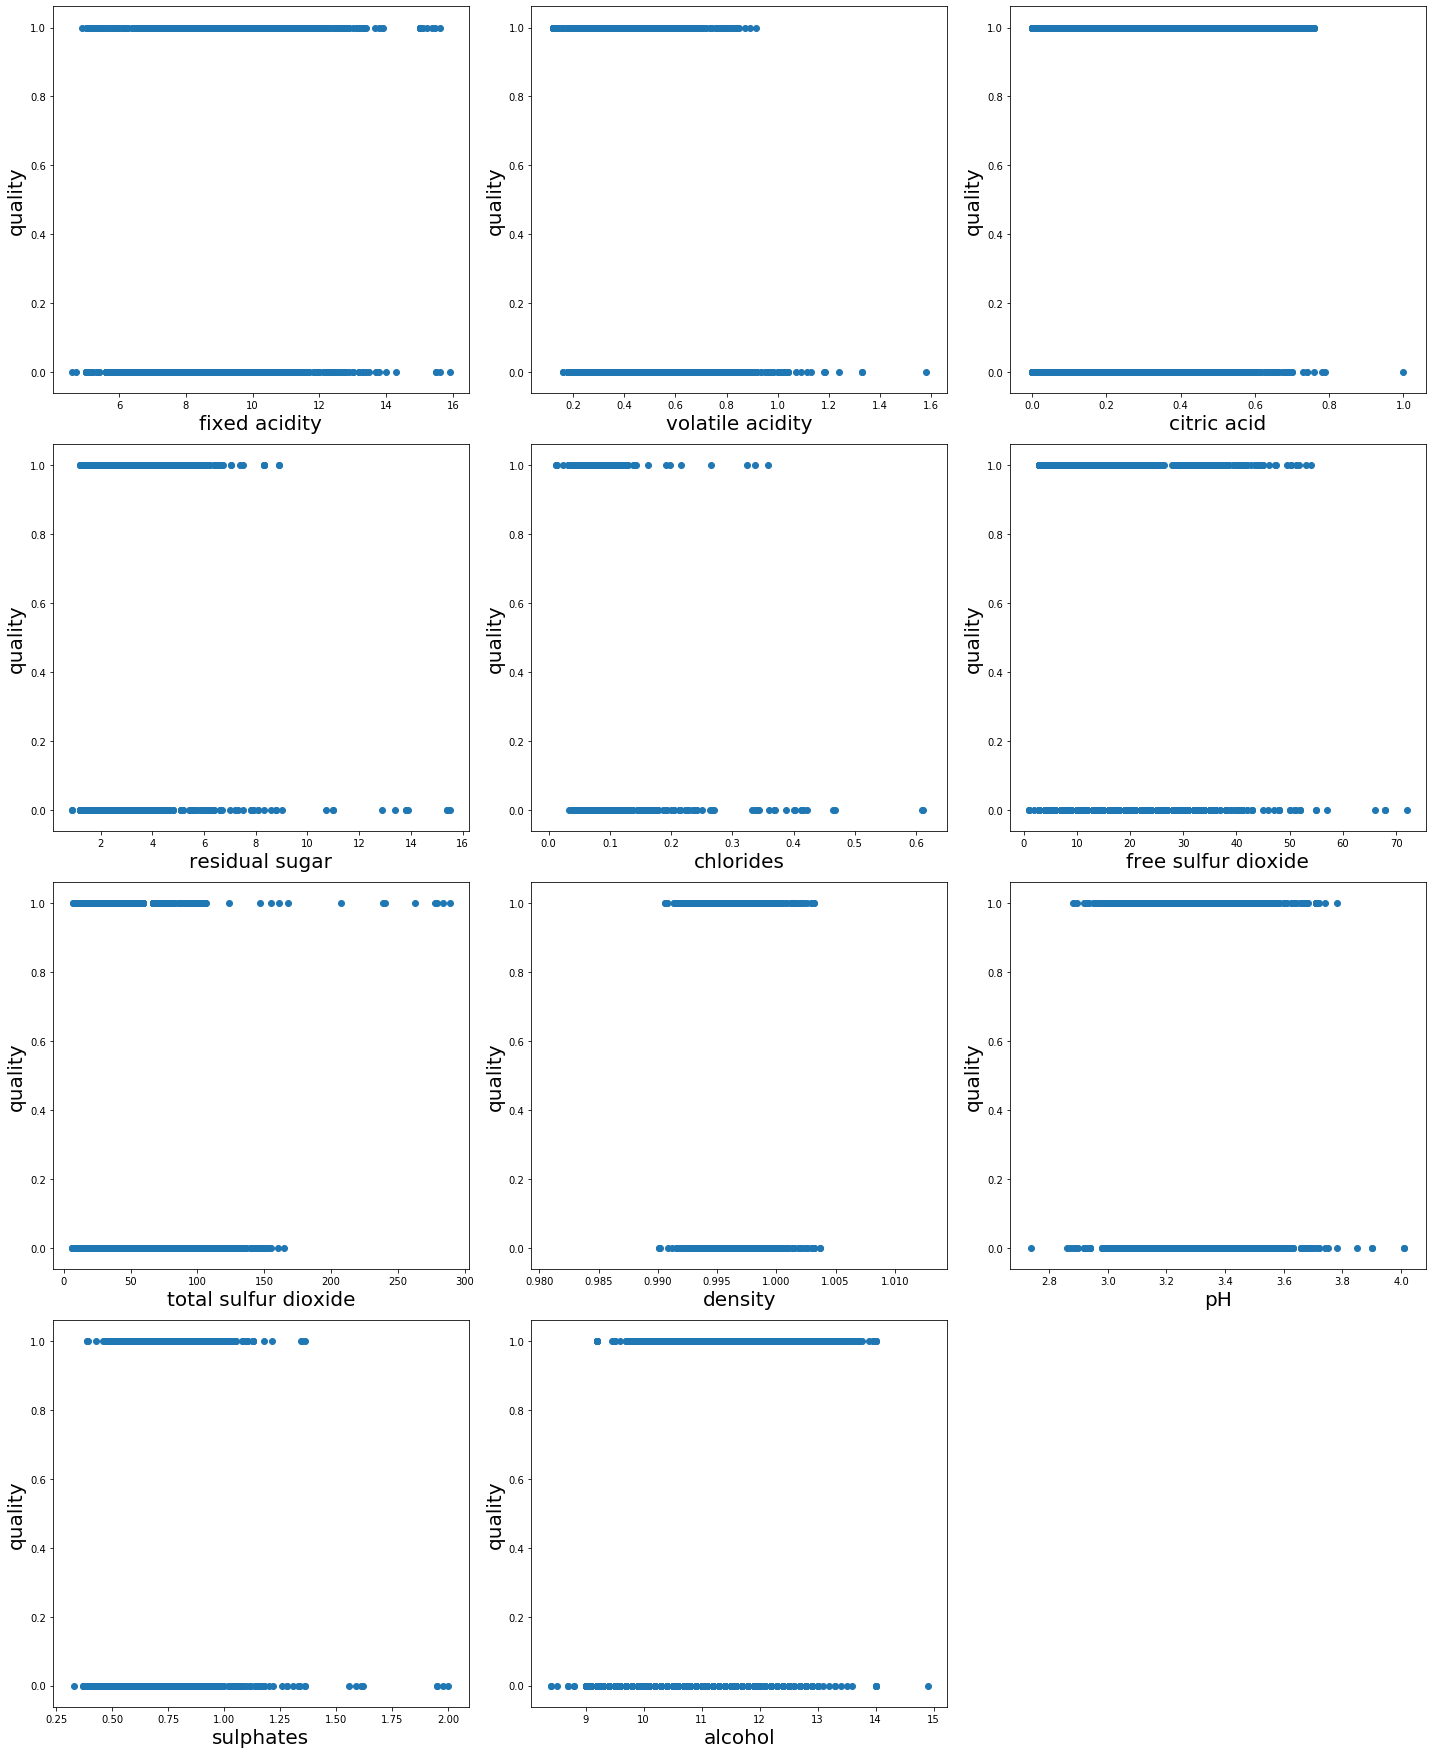

In [17]:
# Check The Relation with quality

Y = data['quality']
X = data.drop(columns=['quality'])
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column], Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('quality',fontsize=20)
    plotnumber+=1
plt.tight_layout()



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

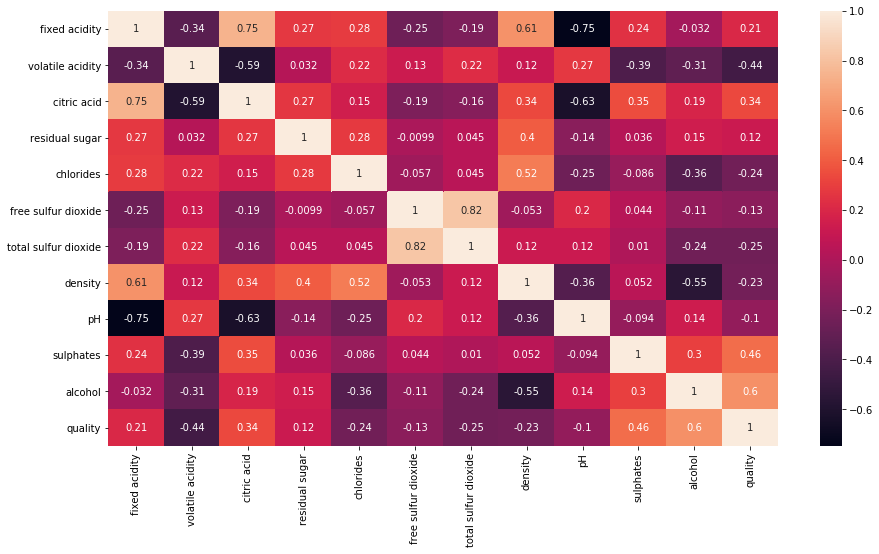

In [18]:
# Check the multicollinearity factor

corr = data.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

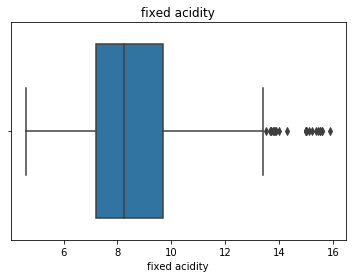

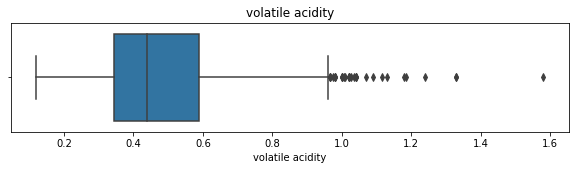

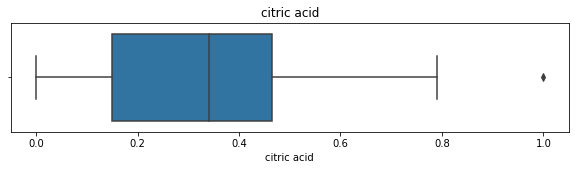

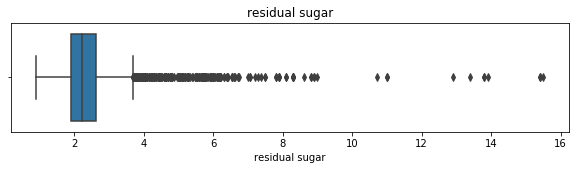

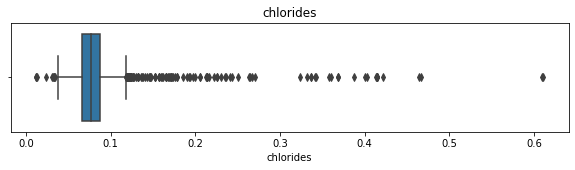

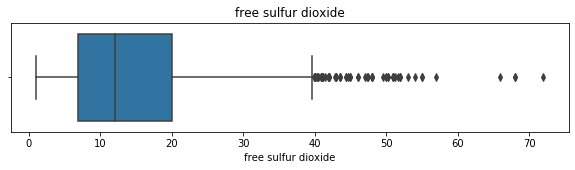

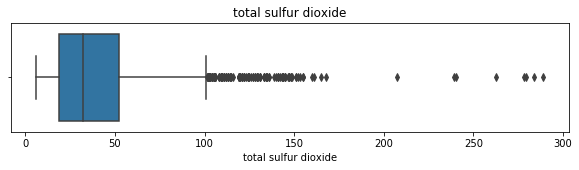

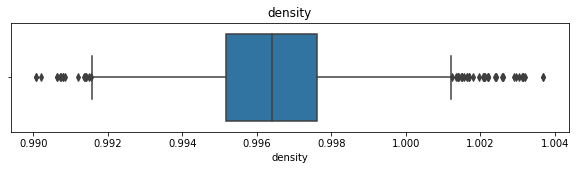

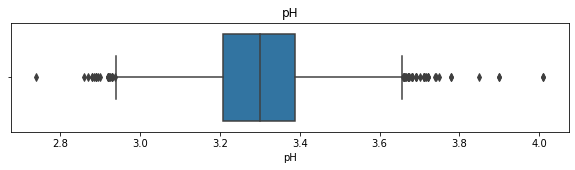

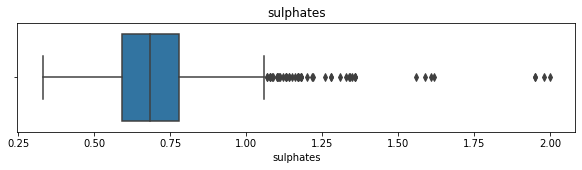

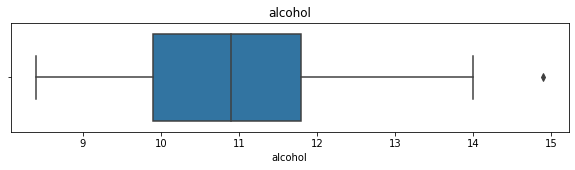

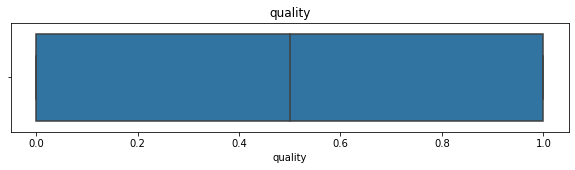

<Figure size 720x144 with 0 Axes>

In [19]:
# decting outliers

for column in data:
    df = data.copy()
    sns.boxplot(df[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

In [20]:
# Handle the outliers

# fixed acidity columns

IQR = data['fixed acidity'].quantile(0.75) - data['fixed acidity'].quantile(0.25)
lower = data['fixed acidity'].quantile(0.25) - (IQR * 1.5)
upper = data['fixed acidity'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['fixed acidity']>=upper, 'fixed acidity']=upper
# data.loc[df['fixed acidity']<=lower, 'fixed acidity']=lower

IQR: 2.4790517110389194,  lower: 3.4874729841749823,  upper: 13.40367982833066


In [21]:
# Handle the outliers

# volatile acidity columns

IQR = data['volatile acidity'].quantile(0.75) - data['volatile acidity'].quantile(0.25)
lower = data['volatile acidity'].quantile(0.25) - (IQR * 1.5)
upper = data['volatile acidity'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['volatile acidity']>=upper, 'volatile acidity']=upper
# data.loc[df['volatile acidity']<=lower, 'volatile acidity']=lower

IQR: 0.24702681054540304,  lower: -0.027567026363507663,  upper: 0.9605402158181046


In [22]:
# Handle the outliers

# citric acid columns

IQR = data['citric acid'].quantile(0.75) - data['citric acid'].quantile(0.25)
lower = data['citric acid'].quantile(0.25) - (IQR * 1.5)
upper = data['citric acid'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['citric acid']>=upper, 'citric acid']=upper
# data.loc[df['citric acid']<=lower, 'citric acid']=lower

IQR: 0.3155144183128915,  lower: -0.32327162746933724,  upper: 0.9387860457822288


In [23]:
# Handle the outliers

# residual sugar columns

IQR = data['residual sugar'].quantile(0.75) - data['residual sugar'].quantile(0.25)
lower = data['residual sugar'].quantile(0.25) - (IQR * 1.5)
upper = data['residual sugar'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['residual sugar']>=upper, 'residual sugar']=upper
# data.loc[df['residual sugar']<=lower, 'residual sugar']=lower

IQR: 0.7100045845048006,  lower: 0.8517435732185747,  upper: 3.6917619112377773


In [24]:
# Handle the outliers

# chlorides columns

IQR = data['chlorides'].quantile(0.75) - data['chlorides'].quantile(0.25)
lower = data['chlorides'].quantile(0.25) - (IQR * 1.5)
upper = data['chlorides'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['chlorides']>=upper, 'chlorides']=upper
data.loc[df['chlorides']<=lower, 'chlorides']=lower

IQR: 0.02073109856626966,  lower: 0.035172253584325845,  upper: 0.11809664784940449


In [25]:
# Handle the outliers

# free sulfur dioxide columns

IQR = data['free sulfur dioxide'].quantile(0.75) - data['free sulfur dioxide'].quantile(0.25)
lower = data['free sulfur dioxide'].quantile(0.25) - (IQR * 1.5)
upper = data['free sulfur dioxide'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['free sulfur dioxide']>=upper, 'free sulfur dioxide']=upper
# data.loc[df['free sulfur dioxide']<=lower, 'free sulfur dioxide']=lower

IQR: 13.18345863946527,  lower: -12.958646598663174,  upper: 39.77518795919791


In [26]:
# Handle the outliers

# total sulfur dioxide columns

IQR = data['total sulfur dioxide'].quantile(0.75) - data['total sulfur dioxide'].quantile(0.25)
lower = data['total sulfur dioxide'].quantile(0.25) - (IQR * 1.5)
upper = data['total sulfur dioxide'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['total sulfur dioxide']>=upper, 'total sulfur dioxide']=upper
# data.loc[df['total sulfur dioxide']<=lower, 'total sulfur dioxide']=lower

IQR: 33.0,  lower: -30.5,  upper: 101.5


In [27]:
# Handle the outliers

# density columns

IQR = data['density'].quantile(0.75) - data['density'].quantile(0.25)
lower = data['density'].quantile(0.25) - (IQR * 1.5)
upper = data['density'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['density']>=upper, 'density']=upper
data.loc[df['density']<=lower, 'density']=lower

IQR: 0.0024174010246004185,  lower: 0.9915564974384989,  upper: 1.0012261015369006


In [28]:
# Handle the outliers

# pH columns

IQR = data['pH'].quantile(0.75) - data['pH'].quantile(0.25)
lower = data['pH'].quantile(0.25) - (IQR * 1.5)
upper = data['pH'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['pH']>=upper, 'pH']=upper
data.loc[df['pH']<=lower, 'pH']=lower

IQR: 0.17930281807204596,  lower: 2.9387617742370216,  upper: 3.6559730465252054


In [29]:
# Handle the outliers

# sulphates columns

IQR = data['sulphates'].quantile(0.75) - data['sulphates'].quantile(0.25)
lower = data['sulphates'].quantile(0.25) - (IQR * 1.5)
upper = data['sulphates'].quantile(0.75) + (IQR * 1.5)
print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")


data.loc[df['sulphates']>=upper, 'sulphates']=upper
# data.loc[df['sulphates']<=lower, 'sulphates']=lower

IQR: 0.19000000000000006,  lower: 0.3049999999999999,  upper: 1.0650000000000002


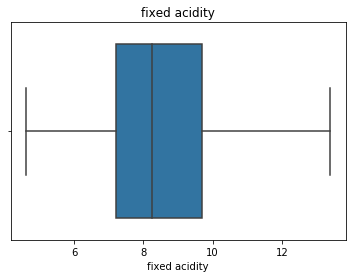

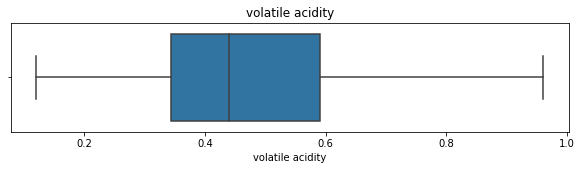

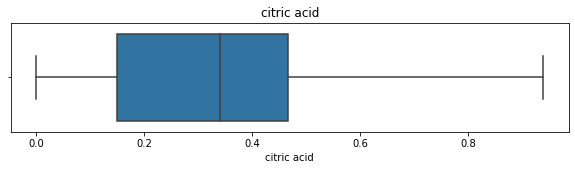

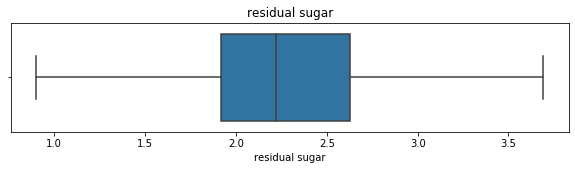

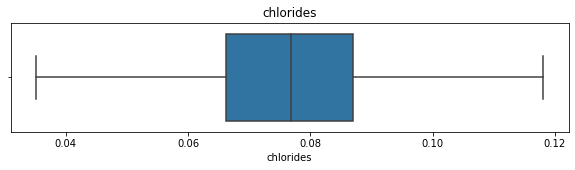

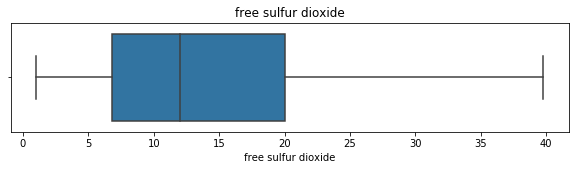

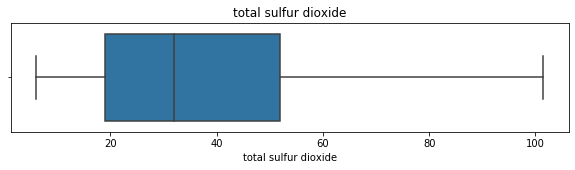

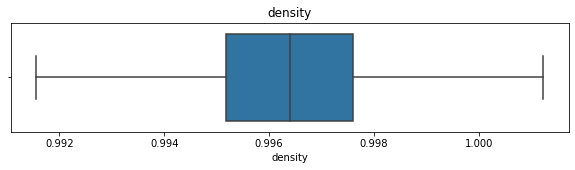

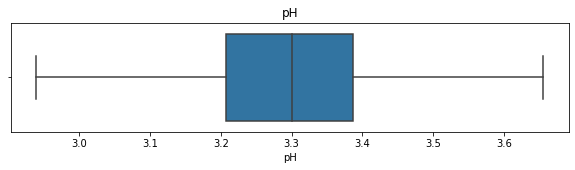

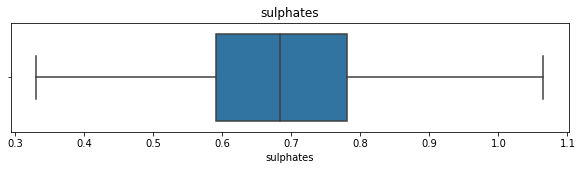

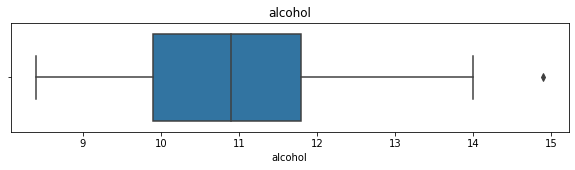

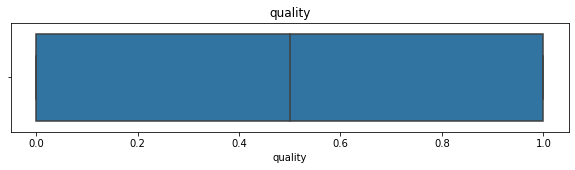

<Figure size 720x144 with 0 Axes>

In [30]:
# decting outliers

for column in data:
    df = data.copy()
    sns.boxplot(df[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

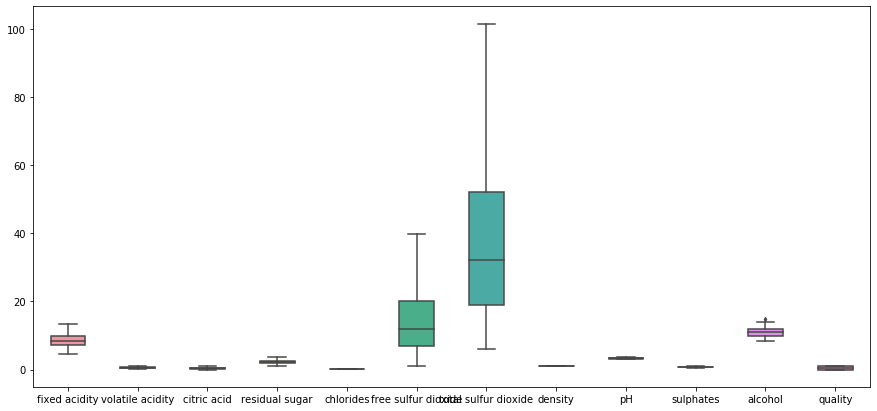

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

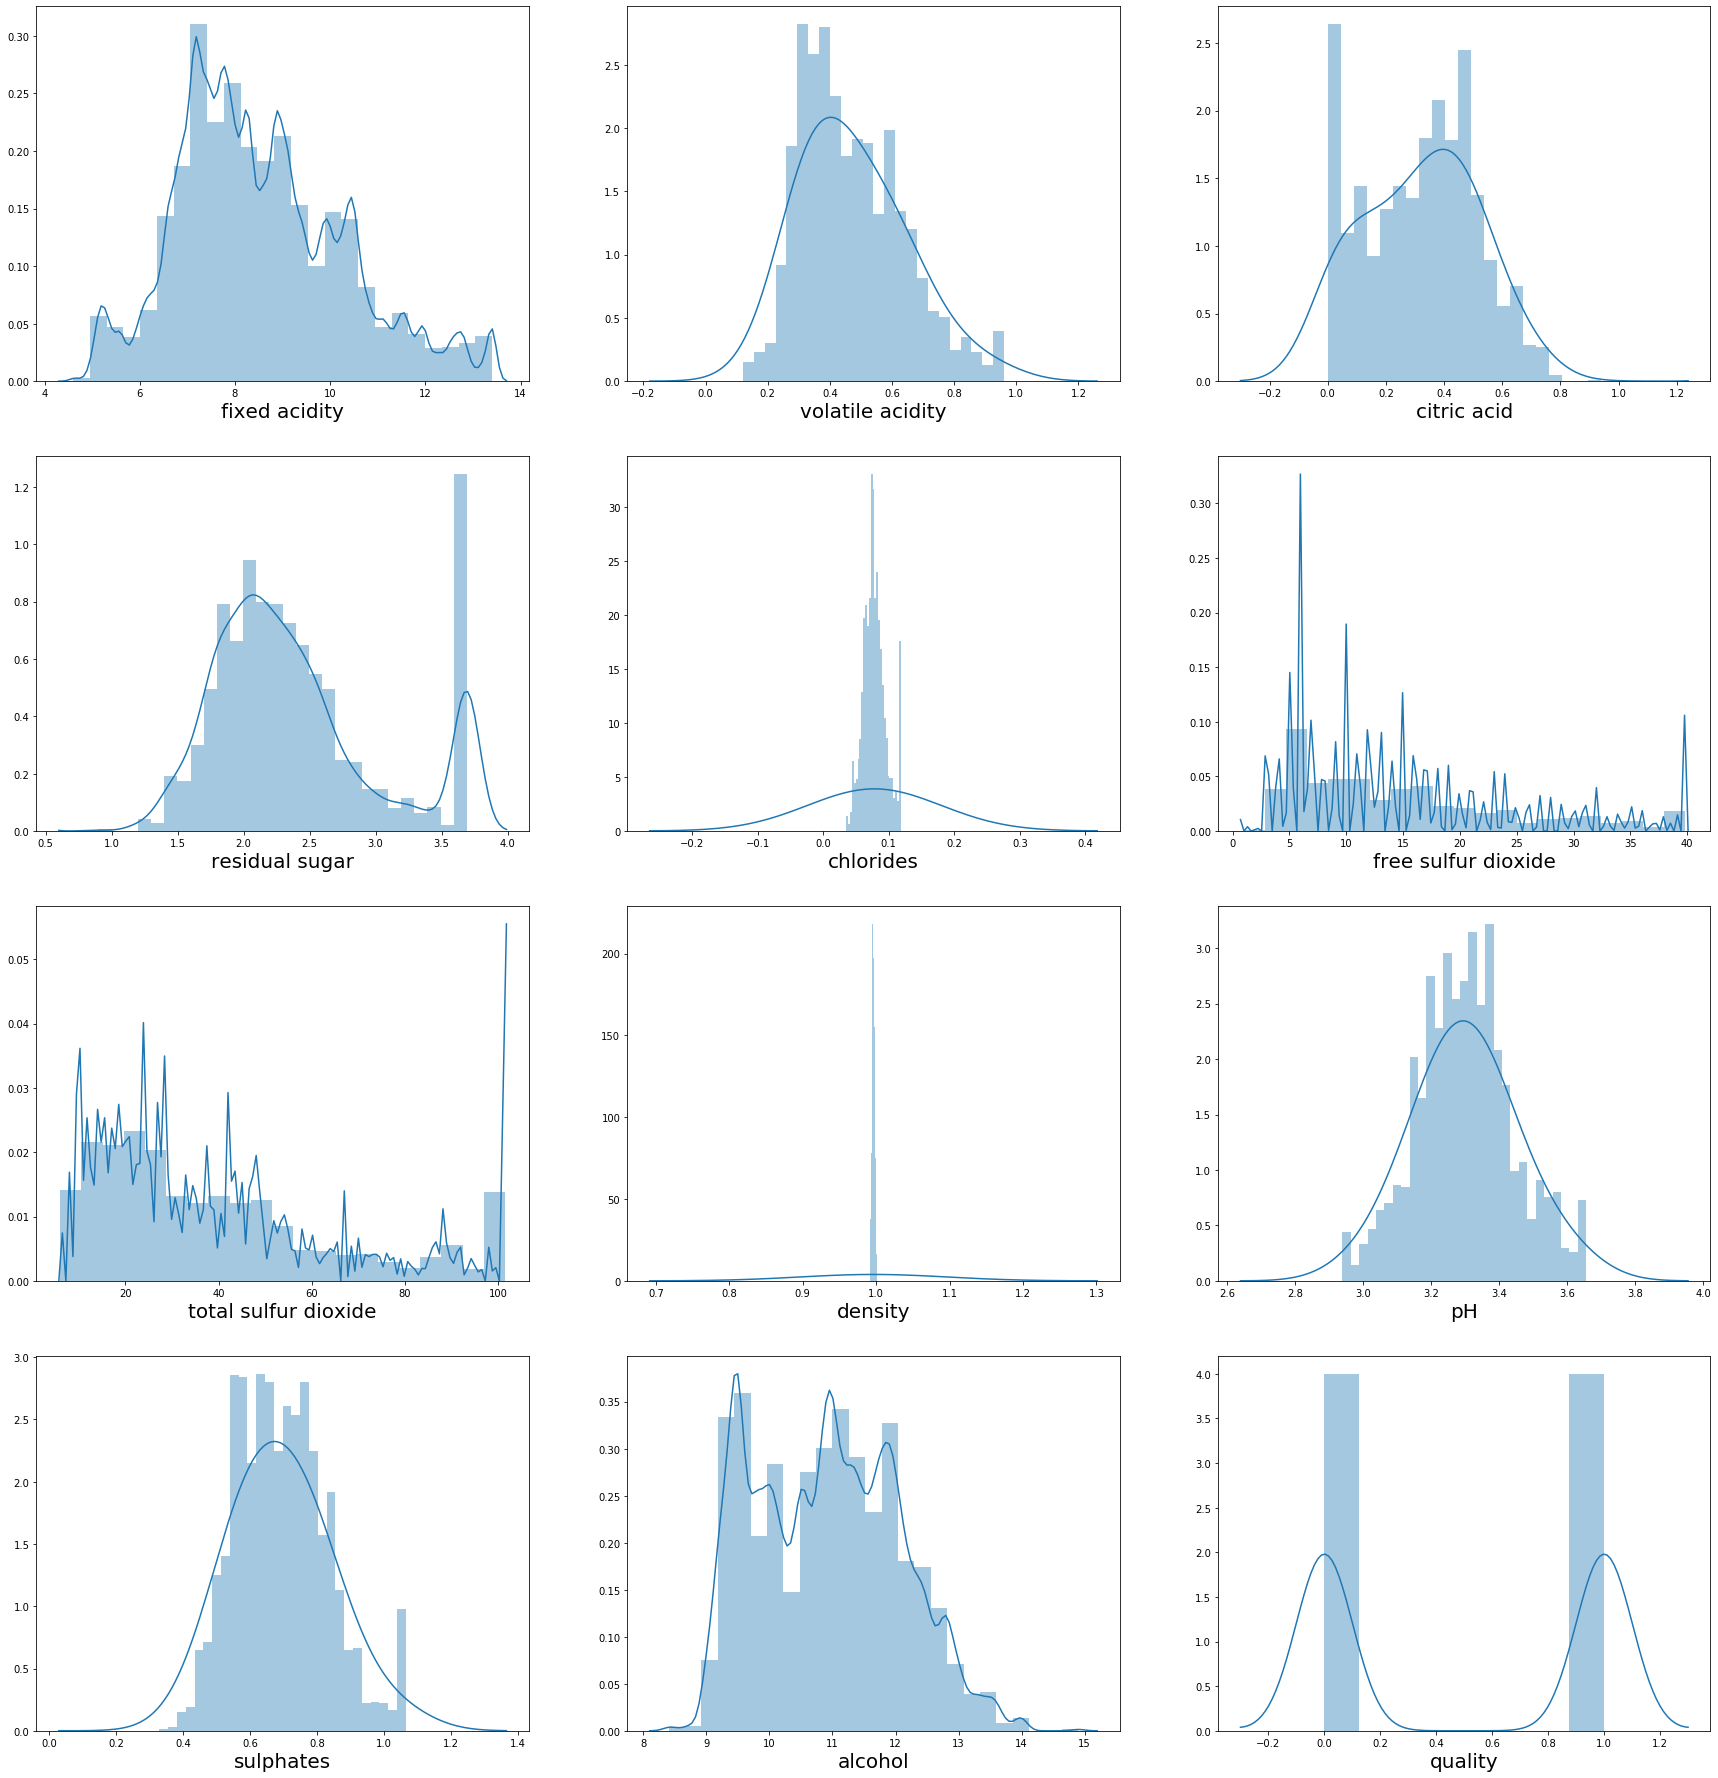

In [32]:
# Again Check the data distribution after handle the outliers

plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

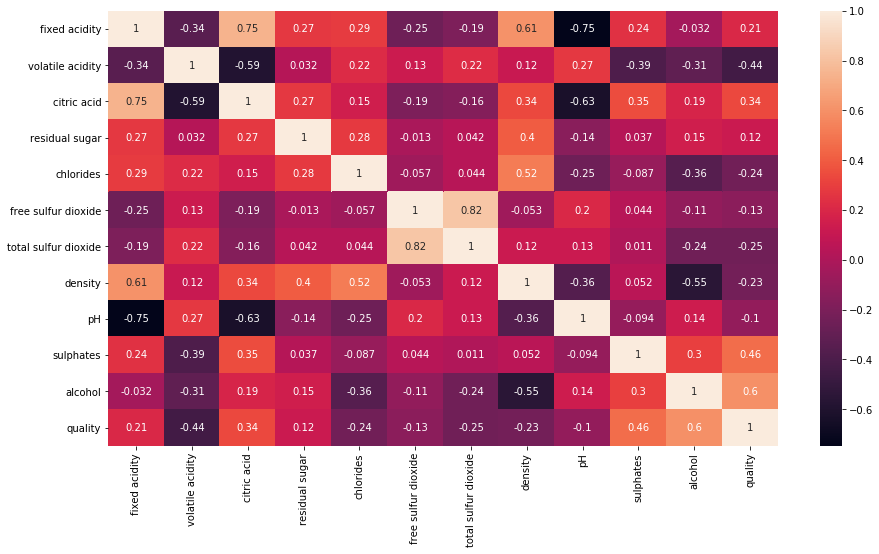

In [33]:
# Again Check the multicollinearity after handle the outliers

corr = data.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

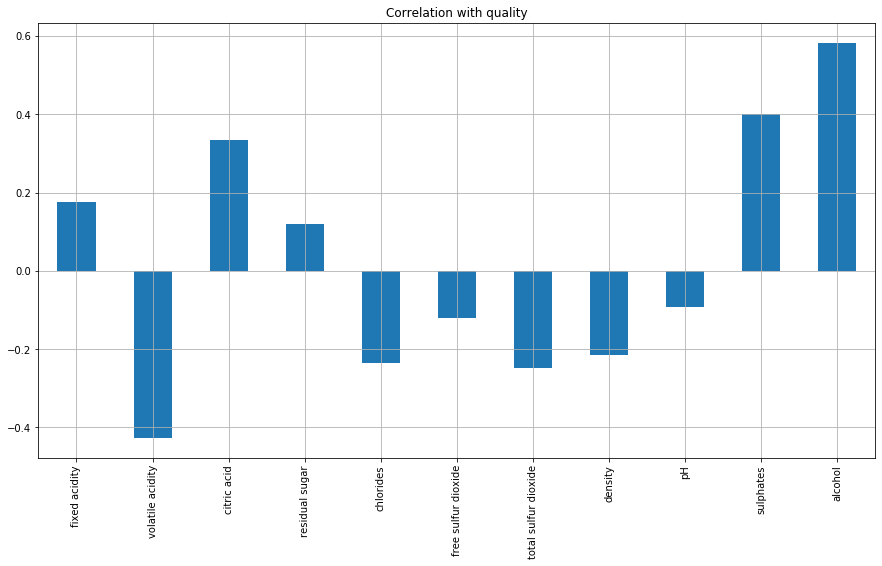

In [34]:
# Correlation with target

data.drop('quality', axis=1).corrwith(data.quality).plot(kind='bar', grid=True, figsize=(15, 8), 
                                                   title="Correlation with quality")

Observations from correlation:

1. residual sugur and pH are the least correlated with the target 
   variable.

2. All other variables have a significant correlation with the target variable.

In [35]:
data.to_csv("../Data/Prepared Data/winequality-red.csv", sep=';', index=None)